<center><h1> Hands Movement<h1><center>

#### What is the hands Movement dataset

This is a data set of an experiment were 12 peoples hand movments were recorde for a period of time, the recorded hand movments were of a person alone, 2 people moving their hands in sync and 2 people moving their hand however they want.

#### What is the goal if this Model?

the goal is  to try make a model which can if given frame of time know if the movement was done alone, in sync or spontanious

### Feature description

**Time:** The time at which the frame was taken

**Frame ID:** ID of the Frame

**Hand Type** Left or Right hand

**hands** how many hands were recorded during this frame

**Position X** hand postion on the x axis

**Position Y** hand postion on the y axis

**Position Z** hand postion on the z axis (height)

**Velocity X** hand movement Velocity on the X axis

**Velocity Y** hand movement Velocity on the Y axis

**Velocity Z** hand movement Velocity on the Z axis

**Pitch** hand position (the position of the hand up or down compared to your wrist an example: stop sign would be 1 and puting the hand horizontal would be 0)

**Roll** hand position (how much is the hand rolled, holdin your hand horizontal would be 0)

**Yaw** hand position (the position of the hand to the rigth or left compared to your wrist)

**Wrist Pos X** wrist postion on the x axis

**Wrist Pos Y** wrist postion on the y axis

**Wrist Pos Z** wrist postion on the z axis

**Elbow pos X** wrist postion on the x axis

**Elbow pos Y** wrist postion on the y axis

**Elbow pos Z** wrist postion on the z axis

**Grab Strenth** only has 0,1: 0 for an open hand and 1 for a closed one

**Grab Angle** how closed the hand is: 0 for an open hend and 1 for closed one

**Pinch Strength** ???

## Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import math

import warnings
warnings.filterwarnings('ignore')

## Get the Data

### Create a df

We will first want to create the data frame so we can work on them, the 7 first second can be deleted from the start

In [288]:
def Create_df_without_7_sec(path):
    df = pd.read_csv(path)
    time_to_drop=math.ceil(df["Time"][0])+7
    df=df[df["Time"]>time_to_drop]
    return df

**Train Set**

In [289]:
#Spontan
Evyatar_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771052727603804Spontan.csv")
Nofar_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Nofar Social_Nuero/Nofar636759795182793299Spontan.csv")
Oriya_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Oriya Social_Nuero/Oriya636759804404113837Spontan.csv")
Orya_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Orya Kalmanovitz/OryaB636771083605535985Spontan.csv")
Revital_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Revital Marbel/Revital636770957038873193Spontan.csv")
Shahar_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Shahar Terner/Sachar636771045591258071Spontan.csv")
Shelly_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Shelly Social_Nuero/Shelly636759787508979097Spontan.csv")
Yael_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Yael Hagai/Yael636771059544754823Spontan.csv")
Yoel_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Yoel Raz/Yoel636760921663075813Spontan.csv")

Spon_List_train = [Evyatar_Spon,Nofar_Spon,Oriya_Spon,Orya_Spon,Revital_Spon,Shahar_Spon,Shelly_Spon,Yael_Spon,Yoel_Spon]

#Sync
Evyatar_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771053639929594Sync.csv")
Nofar_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Nofar Social_Nuero/Nofar636759797397919664Sync.csv")
Oriya_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Oriya Social_Nuero/Oriya636759806131350399Sync.csv")
Orya_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Orya Kalmanovitz/OryaB636771084494502229Sync.csv")
Revital_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Revital Marbel/Revital636770957894370062Sync.csv")
Shahar_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Shahar Terner/Sachar636771046527112972Sync.csv")
Shelly_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Shelly Social_Nuero/Shelly636759789526313406Sync.csv")
Yael_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Yael Hagai/Yael636771060699529085Sync.csv")
Yoel_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Yoel Raz/Yoel636760923490742912Sync.csv")

Sync_List_train = [Evyatar_Sync,Nofar_Sync,Oriya_Sync,Orya_Sync,Revital_Sync,Shahar_Sync,Shelly_Sync,Yael_Sync,Yoel_Sync]

#Alone
Evyatar_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv")
Nofar_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Nofar Social_Nuero/Nofar636759796290435160Alone.csv")
Oriya_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Oriya Social_Nuero/Oriya636759805268396661Alone.csv")
Orya_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Orya Kalmanovitz/OryaB636771082736601528Alone.csv")
Revital_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Revital Marbel/Revital636770955999435879Alone.csv")
Shahar_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Shahar Terner/Sachar636771047408504303Alone.csv")
Shelly_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Shelly Social_Nuero/Shelly636759788383205274Alone.csv")
Yael_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Yael Hagai/Yael636771061659067649Alone.csv")
Yoel_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Training/Yoel Raz/Yoel636760922573364655Alone.csv")

Alone_List_train = [Evyatar_Alone,Nofar_Alone,Oriya_Alone,Orya_Alone,Revital_Alone,Shahar_Alone,Shelly_Alone,Yael_Alone,Yoel_Alone]


**Test Set:**

In [290]:
#Spontan
Itiel_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Itiel Lab/Itiel636770940701219076Spontan.csv")
Mor_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Mor SHerman/Mor636771064635567065Spontan.csv")
Oded_Spon = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Oded Medina/Oded636754670490266956Spontan.csv")

Spon_List_test = [Itiel_Spon,Mor_Spon,Oded_Spon]

#Sync
Itiel_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Itiel Lab/Itiel636770941638547912Sync.csv")
Mor_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Mor SHerman/Mor636771065531910215Sync.csv")
Oded_Sync = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Oded Medina/Oded636754671560850581Sync.csv")

Sync_List_test = [Itiel_Sync,Mor_Sync,Oded_Sync]

#Alone
Itiel_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Itiel Lab/Itiel636770942529041679Alone.csv")
Mor_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Mor SHerman/Mor636771066407626524Alone.csv")
Oded_Alone = Create_df_without_7_sec("csv folder/Hand_Movement/Validation/Oded Medina/Oded636754669540564461Alone.csv")

Alone_List_test = [Itiel_Alone,Mor_Alone,Oded_Alone]


### Combine data frames of the same type

**Train Set**

In [291]:
Spon_df_train = pd.concat(Spon_List_train)
Sync_df_train = pd.concat(Sync_List_train)
Alone_df_train = pd.concat(Alone_List_train)
#check if it worked
print("Shape of Spontan train data frame: ",Spon_df_train.shape)
print("Shape of Sync train data frame: ",Sync_df_train.shape)
print("Shape of Alone train data frame: ",Alone_df_train.shape)

Shape of Spontan train data frame:  (68691, 22)
Shape of Sync train data frame:  (68194, 22)
Shape of Alone train data frame:  (34823, 22)


**Test Set:**

In [292]:
Spon_df_test = pd.concat(Spon_List_test)
Sync_df_test = pd.concat(Sync_List_test)
Alone_df_test = pd.concat(Alone_List_test)
#check if it worked
print("Shape of Spontan test data frame: ",Spon_df_test.shape)
print("Shape of Sync test data frame: ",Sync_df_test.shape)
print("Shape of Alone test data frame: ",Alone_df_test.shape)

Shape of Spontan test data frame:  (20302, 22)
Shape of Sync test data frame:  (20067, 22)
Shape of Alone test data frame:  (10360, 22)


### Data Cleaning

In [293]:
def Cleaning_Spon_Sync(df):
    df2 = df[df[' # hands'] == 2]
    df2.dropna(axis=0,inplace=True)
    return df2

In [313]:
def Cleaning_Alone(df):
    df2 = df[df[' Hand Type'] == 'left']
    df3 = df2[df[' # hands'] == 1]
    df3.dropna(axis=0,inplace=True)
    return df3

In [298]:
def Cleaning_Right_hand(df):
    df2 = df[df[' Hand Type'] == 'right']
    df3 = df2[df[' # hands'] == 1]
    df3.dropna(axis=0,inplace=True)
    return df3

**Right Hand Set**

In [299]:
Right_Hand = pd.read_csv('csv folder/Hand_Movement/HandRight.csv')
Right_Hand = Cleaning_Right_hand(Right_Hand)

In [300]:
Right_Hand.isnull().sum().sum()

0

**Train Set**

In [311]:
Spon_df_train = Cleaning_Spon_Sync(Spon_df_train)
Sync_df_train = Cleaning_Spon_Sync(Sync_df_train)
Alone_df_train = Cleaning_Alone(Alone_df_train)

**Test Set:**

In [314]:
Spon_df_test = Cleaning_Spon_Sync(Spon_df_test)
Sync_df_test = Cleaning_Spon_Sync(Sync_df_test)
Alone_df_test = Cleaning_Alone(Alone_df_test)

### Combine Right and left hand

In [319]:
def Combine_Hands_Spon_Sync(df):
    hand_Type = df.groupby(df[' Hand Type'])
    right = hand_Type.get_group("right")
    left = hand_Type.get_group("left")
    df = pd.merge(left, right, how='left', on= ' Frame ID')
    return df

In [320]:
def Combine_Hands_Alone(df,Right_Hand):
    Right_Hand = Right_Hand.reset_index(drop=True)
    df=df.reset_index(drop=True)
    df= pd.merge(df,Right_Hand,left_index=True,right_index=True,how='left')
    return df

**Right Hand Set**

In [321]:
print("Shape of Alone: ",Alone_df_train.shape," ,Compared to the Shape Right Hand ",Right_Hand.shape)

Shape of Alone:  (33754, 22)  ,Compared to the Shape Right Hand  (4314, 22)


We have to make Right_Hand Artfically bigger

In [322]:
New_HandRight = pd.DataFrame()
for i in range(9):
    New_HandRight = pd.concat([New_HandRight,Right_Hand])

**Train Set**

In [323]:
Spon_df_train = Combine_Hands_Spon_Sync(Spon_df_train)
Sync_df_train = Combine_Hands_Spon_Sync(Sync_df_train)
Alone_df_train = Combine_Hands_Alone(Alone_df_train,New_HandRight)
#check if it worked
print("Shape of Spontan train data frame: ",Spon_df_train.shape)
print("Shape of Sync train data frame: ",Sync_df_train.shape)
print("Shape of Alone train data frame: ",Alone_df_train.shape)

Shape of Spontan train data frame:  (53327, 43)
Shape of Sync train data frame:  (45887, 43)
Shape of Alone train data frame:  (33754, 44)


**Test Set:**

In [324]:
Spon_df_test = Combine_Hands_Spon_Sync(Spon_df_test)
Sync_df_test = Combine_Hands_Spon_Sync(Sync_df_test)
Alone_df_test = Combine_Hands_Alone(Alone_df_test,New_HandRight)
#check if it worked
print("Shape of Spontan test data frame: ",Spon_df_test.shape)
print("Shape of Sync test data frame: ",Sync_df_test.shape)
print("Shape of Alone test data frame: ",Alone_df_test.shape)

Shape of Spontan test data frame:  (10119, 43)
Shape of Sync test data frame:  (9923, 43)
Shape of Alone test data frame:  (9906, 44)


### Removing features

There a few features we need to remove because they will destroy or distrub the models

- Frame ID - the iD wont help the model learning anything and could even disturb the model
- num hands - if the models the number of hands it will be way to easy to know which is alone
- hand Type - every row has left and right after the combination so it is not really helpfull
- Time - every row is the data for a frame and it wont matter when it was, the data describing the moment is whats importent

In [325]:
def DeleteFeatures_Spon_Sync(df):
    df.drop(['Time_x','Time_y',' Frame ID',' Hand Type_x',' Hand Type_y',' # hands_x',' # hands_y'], inplace = True, axis = 1)
    return df

In [326]:
def DeleteFeatures_Alone(df):
    df.drop(['Time_x','Time_y',' Frame ID_x',' Frame ID_y',' Hand Type_x',' Hand Type_y',' # hands_x',' # hands_y'], inplace = True, axis = 1)
    return df

**Train Set**

In [327]:
Spon_df_train = DeleteFeatures_Spon_Sync(Spon_df_train)
Sync_df_train = DeleteFeatures_Spon_Sync(Sync_df_train)
Alone_df_train = DeleteFeatures_Alone(Alone_df_train)

In [328]:
Spon_df_train.head()

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-102.2870,198.3166,-2.122641,-174.57210,379.1468,28.479910,1.423625,0.510471,1.481006,-164.0542,...,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752
1,-103.8721,201.4944,-2.063620,-178.50250,357.8548,6.646493,1.429039,0.500107,1.486744,-165.7898,...,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775
2,-106.3691,207.4667,-2.337110,-126.78780,318.5284,-12.872290,1.441357,0.489946,1.496526,-168.4939,...,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940
3,-107.9509,212.1324,-2.788956,-74.28078,244.4823,-30.771300,1.444497,0.483316,1.499930,-170.1878,...,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777
4,-109.5427,216.8003,-3.337280,-96.49666,269.5434,-37.723870,1.431969,0.488396,1.491886,-171.4205,...,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000


**Test Set:**

In [329]:
Spon_df_test = DeleteFeatures_Spon_Sync(Spon_df_test)
Sync_df_test = DeleteFeatures_Spon_Sync(Sync_df_test)
Alone_df_test = DeleteFeatures_Alone(Alone_df_test)

### Adding Label

In [330]:
def Label_Spon(df):
    df.insert(loc=1,column='label', value = 1)
    return df

In [331]:
def Label_Sync(df):
    df.insert(loc=1,column='label', value = 2)
    return df

In [332]:
def Label_Alone(df):
    df.insert(loc=1,column='label', value = 3)
    return df

**Train Set**

In [333]:
Spon_df_train = Label_Spon(Spon_df_train)
Sync_df_train = Label_Sync(Sync_df_train)
Alone_df_train = Label_Alone(Alone_df_train)

In [334]:
Alone_df_train.head()

,Position X_x,label,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-46.60518,3,178.0750,-18.75702,5.439669,96.988980,-12.10281,0.670744,2.865586,1.276748,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,-47.65659,3,180.8680,-18.60894,-88.205730,216.326900,22.97837,0.730817,2.949419,1.289513,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,-49.63403,3,186.0965,-18.27436,-133.965000,338.190200,17.42292,0.783819,3.000619,1.295304,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,-51.27046,3,190.2099,-18.01929,-79.817410,174.090800,15.08286,0.811619,3.016540,1.300166,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,-52.21944,3,190.8335,-17.44433,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


**Test Set:**

In [335]:
Spon_df_test = Label_Spon(Spon_df_test)
Sync_df_test = Label_Sync(Sync_df_test)
Alone_df_test = Label_Alone(Alone_df_test)

### Combining Data frames

**Train Set**

In [336]:
Train_dfs = [Spon_df_train,Sync_df_train,Alone_df_train]
train = pd.concat(Train_dfs)
print("Shape of the Train Data frame: ",train.shape)

Shape of the Train Data frame:  (132968, 37)


**Test Set:**

In [337]:
Test_dfs = [Spon_df_test,Sync_df_test,Alone_df_test]
test = pd.concat(Test_dfs)
print("Shape of the Test Data frame: ",test.shape)

Shape of the Test Data frame:  (29948, 37)


### Final Touch
we should not take every thing, there should be a time diffrence bewtween the rows so the machine learning can see the diffrence time makes better

**Train Set**

In [338]:
Train_Copy = train.copy()
Train_Copy = Train_Copy.iloc[::5, :]
Train_Copy = Train_Copy.reset_index()
Train_Copy = Train_Copy.drop(['index'], axis = 1)
Train_Copy

,Position X_x,label,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-102.2870,1,198.3166,-2.122641,-174.572100,379.146800,28.47991,1.423625,0.510471,1.481006,...,-0.563396,191.40880,170.3479,8.976357,323.5327,21.270530,162.7099,1.000000,2.793122,0.329752
1,-111.0334,1,221.8990,-4.233740,-88.140770,312.680800,-57.56472,1.414351,0.479057,1.483696,...,-0.571620,194.47760,174.5095,12.378550,334.0120,28.212550,162.1857,0.726005,1.746419,0.000000
2,-114.9668,1,248.1758,-11.774280,-9.856286,300.892600,-100.13740,1.302510,0.343234,1.468192,...,-0.846780,205.32910,192.2522,-1.164861,377.7744,76.749550,141.0905,0.211765,1.101117,0.000000
3,-113.7012,1,265.1228,-18.019300,-29.714810,232.726900,-112.08070,1.487226,0.126440,1.560127,...,-0.981201,206.53770,202.8605,-7.007293,363.4305,98.060070,159.4749,0.171141,1.188835,0.000000
4,-112.6701,1,277.2960,-30.252610,4.098410,104.769500,-167.08080,1.457922,0.059495,1.564091,...,-0.983934,203.25410,211.0339,-3.208927,318.1394,142.557900,209.9082,0.134066,1.166122,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26589,-114.3659,3,213.2949,31.358430,-114.395200,112.020600,108.55900,1.091780,1.316953,0.604451,...,-0.196009,20.30352,176.7513,44.159360,122.3983,-1.002545,222.9354,0.000000,0.321077,0.000000
26590,-115.4302,3,214.5807,29.427190,-16.331440,-59.822620,-60.43761,1.074734,1.334178,0.599205,...,-0.449606,17.78373,168.7832,56.397090,150.0344,3.164037,226.8691,0.000000,0.391455,0.000000
26591,-135.1533,3,221.4743,23.070850,-15.349280,22.321920,-68.53466,1.138973,1.532965,0.138394,...,-0.153955,15.30889,167.8103,69.591630,163.3719,36.890220,256.3632,0.000000,0.500012,0.000000
26592,-127.6903,3,214.3489,17.686630,10.166750,-1.436222,32.29176,1.091671,1.468609,0.283953,...,-0.107443,12.34609,162.4587,73.419620,159.9848,71.551350,282.8759,0.000000,0.736438,0.000000


**Test Set:**

In [339]:
Test_Copy = test.copy()
Test_Copy = Test_Copy.iloc[::5, :]
Test_Copy = Test_Copy.reset_index()
Test_Copy = Test_Copy.drop(['index'], axis = 1)
Test_Copy

,Position X_x,label,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-156.97650,1,201.4564,36.14886,-178.357800,90.193660,139.007300,0.433322,0.871869,1.202844,...,-0.446870,167.4719,162.4422,38.65091,281.7125,-23.217560,163.8082,0.0,0.000000,0.0
1,-155.87420,1,206.4794,43.17121,122.709800,6.326851,36.926420,0.631212,0.397699,1.342714,...,-0.444217,171.0828,178.3642,50.85502,279.5784,-26.478050,148.0825,0.0,0.032546,0.0
2,-153.50380,1,209.3631,48.52747,-8.436534,80.975650,85.756040,1.070392,0.347320,1.421218,...,-0.428619,175.2596,188.2948,62.08353,308.8388,1.946450,165.1162,0.0,0.000000,0.0
3,-153.67200,1,217.0183,53.88290,-23.187920,115.882300,47.683140,1.241220,0.313590,1.464132,...,-0.442290,178.4757,190.6823,65.61627,337.5593,31.926320,178.1940,0.0,0.000000,0.0
4,-150.69320,1,220.1934,55.89275,37.328140,53.808510,8.125199,1.454663,0.346119,1.527884,...,-0.473864,179.4405,185.0987,60.95058,315.5419,-1.976919,159.2561,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,-26.97896,3,296.7349,55.70233,-27.701310,44.818310,7.264846,0.409665,-0.111903,1.020852,...,0.031373,113.3407,175.3525,132.45410,205.5294,68.712940,368.1739,0.0,0.511823,0.0
5986,-33.70744,3,306.9808,61.53012,-27.371520,-24.677850,10.144730,0.784442,0.162835,1.045095,...,0.116033,152.9286,181.1347,138.67260,200.6873,60.261550,380.6300,0.0,0.499285,0.0
5987,-41.41603,3,296.7560,64.18919,-83.312790,-49.900630,36.096030,1.075055,0.280041,1.148169,...,0.228019,181.3348,180.8903,145.27400,158.9159,33.120250,375.6996,0.0,0.579103,0.0
5988,-55.31352,3,287.5695,66.18892,-65.303000,-45.324890,-11.329180,1.180923,0.542479,1.070412,...,0.289735,188.1464,177.8251,148.97580,165.9259,32.977290,381.2686,0.0,0.522458,0.0


## Visualization of the Data

<function matplotlib.pyplot.show(close=None, block=None)>

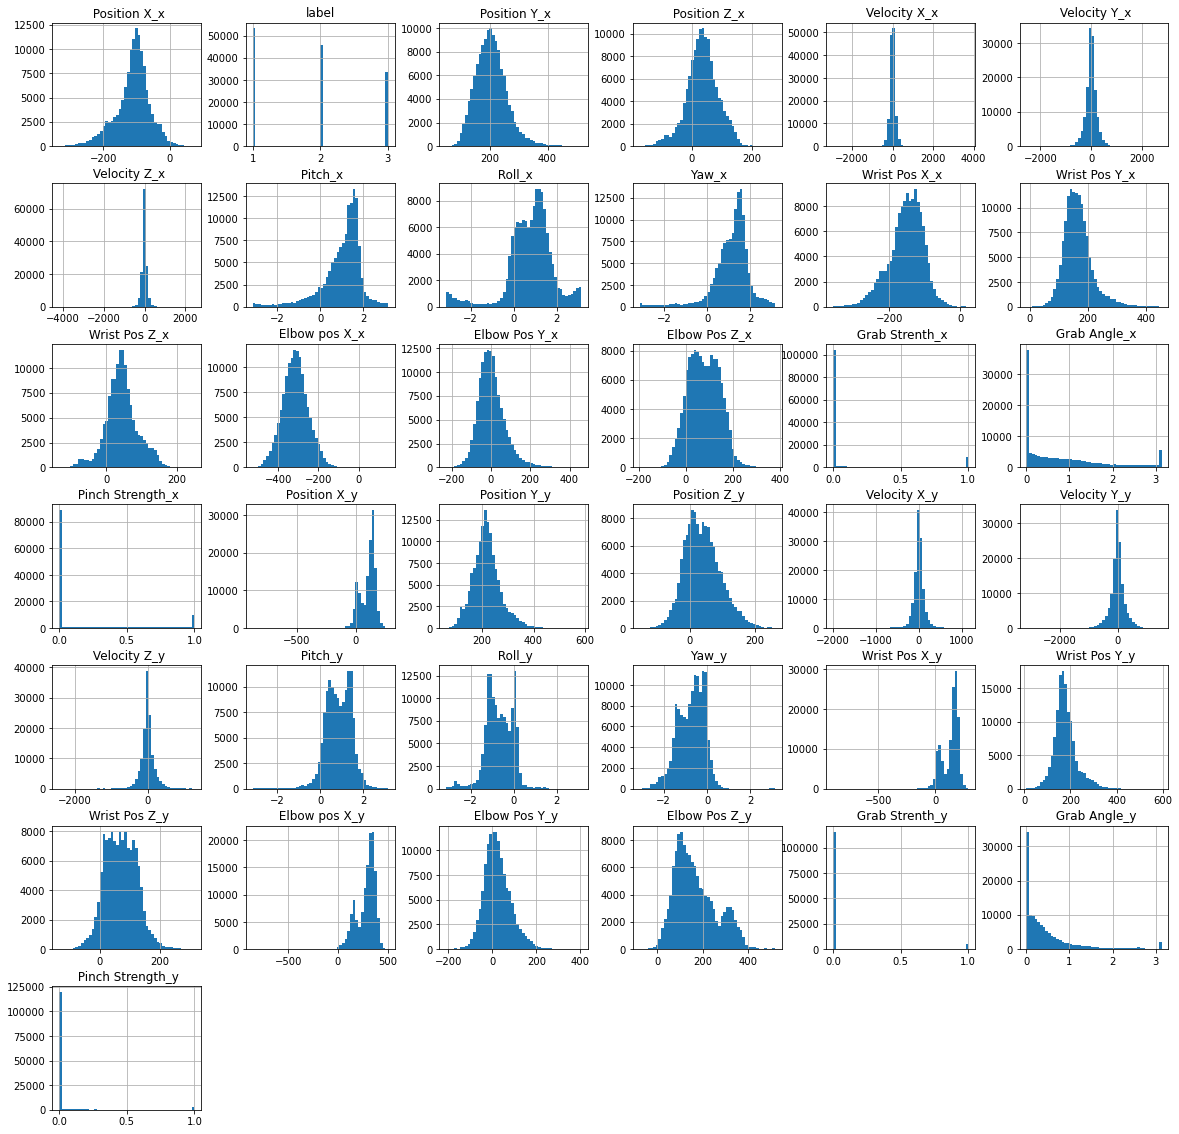

In [255]:
train.hist(bins = 50, figsize = (20,20))
plt.show

## Create a Test set

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [342]:
Train_Copy = shuffle(Train_Copy)
Test_Copy = shuffle(Test_Copy)

In [343]:
X_train= Train_Copy.drop(["label"],axis =1)
y_train= Train_Copy["label"]


X_test = Test_Copy.drop(["label"],axis =1)
y_test= Test_Copy["label"]

## Model Preproccesing

In [278]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

We want to use Pca so we need to normalize the data first, Lets creat a pipeline which does it in one go

### Preprocessing Pipeline

We want use pca so we first have to normalize the data with a scaler.

In [345]:
pre_process = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=0.95))])

### Transforming the data

In [346]:
# we will preprocess the data
X_train_transformed = pre_process.fit_transform(X_train)
X_test_transformed = pre_process.transform(X_test)
X_train_transformed

array([[ 4.92028029e+00,  1.94304210e-02,  5.16830439e-01, ...,
         3.67070557e-01, -1.48489003e-01,  2.45153195e-01],
       [ 2.49507646e+00, -8.65532405e-01,  1.66707660e+00, ...,
        -2.01408662e+00,  1.09689531e+00,  1.14287367e+00],
       [ 4.06420519e+00,  1.11176965e+00, -1.88307231e+00, ...,
        -4.54189610e-01, -1.75731384e-01, -2.25441979e-01],
       ...,
       [-1.94234598e+00,  1.80687722e-01,  7.40221226e-01, ...,
         5.96477470e-01, -7.52971891e-01, -9.59845878e-01],
       [ 5.87888485e-01, -2.28637910e+00,  7.25394503e-01, ...,
         3.26042640e-01,  9.70970839e-01, -8.42392207e-01],
       [ 1.95908546e-01, -3.89484806e+00,  2.73431557e+00, ...,
         2.00308586e-01, -2.46071266e-01, -3.68853532e-04]])

## Model Training

The Result of **Model Training** are in an orderly manner in **Model Evaluation**

In [368]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

This next function prints out the Result of the grid search in an orderly manner
- On the list of all the result, the first acuracy score is of the train set and the second of the test set, so that it is possible to see if there is overfitting

In [372]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

def grid_search(model, grid_param):
    print("Obtaining Best Model for {}".format(model.__class__.__name__))
    grid_search = GridSearchCV(model, grid_param, cv=kf, scoring='accuracy', return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Scores: ", grid_search.best_score_)
    
    cvres = grid_search.cv_results_
    print("\nResults for each run of {}...".format(model.__class__.__name__))
    for train_mean_score, test_mean_score, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
        print(train_mean_score, test_mean_score, params)
        
    return grid_search.best_estimator_

### KNN

              precision    recall  f1-score   support

           1       0.81      0.82      0.82      2024
           2       0.81      0.81      0.81      1985
           3       1.00      0.98      0.99      1981

    accuracy                           0.87      5990
   macro avg       0.87      0.87      0.87      5990
weighted avg       0.87      0.87      0.87      5990

Accuracy:  0.8721202003338898


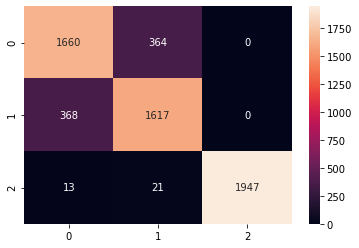

In [348]:
#fit the model
Knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
Knn.fit(X_train_transformed,y_train)

#make predictions
PredicKnn = Knn.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicKnn)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicKnn)
Knn_score = accuracy_score(y_test, PredicKnn)
print(class_rep)
print("Accuracy: ", Knn_score)

#### Grid Search

In [370]:
Knn_param_grid = [{'n_neighbors':[4,6,8,10,12,14,16,18], 'algorithm':['auto', 'kd_tree']}]
Knn_grid_Search = grid_search(Knn, Knn_param_grid)

Obtaining Best Model for KNeighborsClassifier
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 4}
Best Scores:  0.9674361731319902

Results for each run of KNeighborsClassifier...
0.9852316381709452 0.9674361731319902 {'algorithm': 'auto', 'n_neighbors': 4}
0.9782093662852878 0.9631494904873508 {'algorithm': 'auto', 'n_neighbors': 6}
0.9721929711658248 0.9589755827190991 {'algorithm': 'auto', 'n_neighbors': 8}
0.9672670569488048 0.955328082619935 {'algorithm': 'auto', 'n_neighbors': 10}
0.9623787296455582 0.9522070821066857 {'algorithm': 'auto', 'n_neighbors': 12}
0.9585150906810584 0.9490484593290311 {'algorithm': 'auto', 'n_neighbors': 14}
0.955309467048156 0.9455138613757079 {'algorithm': 'auto', 'n_neighbors': 16}
0.9526678985319462 0.9438216867289283 {'algorithm': 'auto', 'n_neighbors': 18}
0.9852316381709452 0.9674361731319902 {'algorithm': 'kd_tree', 'n_neighbors': 4}
0.9782093662852878 0.9631494904873508 {'algorithm': 'kd_tree', 'n_neighbors': 6}
0.9721929711658248 0.9589

In [375]:
Knn_grid_Search.n_neighbors = 18
Knn_grid_Search.algorithm = 'auto'

#### Result of Grid Search

              precision    recall  f1-score   support

           1       0.80      0.87      0.83      2024
           2       0.84      0.79      0.81      1985
           3       1.00      0.98      0.99      1981

    accuracy                           0.88      5990
   macro avg       0.88      0.88      0.88      5990
weighted avg       0.88      0.88      0.88      5990

Accuracy:  0.8774624373956594


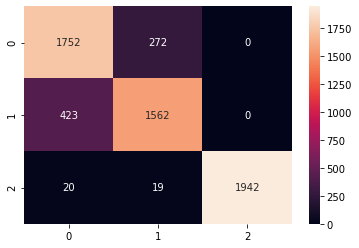

In [376]:
PredicKnn2 = Knn_grid_Search.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicKnn2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicKnn2)
Knn_score2 = accuracy_score(y_test, PredicKnn2)
print(class_rep)
print("Accuracy: ", Knn_score2)

### Logistic Regression

              precision    recall  f1-score   support

           1       0.70      0.94      0.80      2024
           2       0.90      0.60      0.72      1985
           3       1.00      1.00      1.00      1981

    accuracy                           0.84      5990
   macro avg       0.87      0.84      0.84      5990
weighted avg       0.87      0.84      0.84      5990

Accuracy:  0.8440734557595994


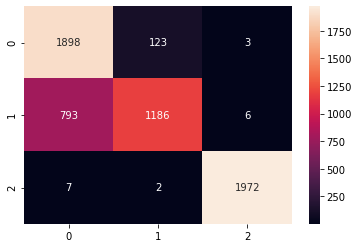

In [349]:
#fit the model
logR = LogisticRegression(random_state=42, n_jobs=-1)
logR.fit(X_train_transformed,y_train)

#make predictions
PredicLogR = logR.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicLogR)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicLogR)
logR_score = accuracy_score(y_test, PredicLogR)
print(class_rep)
print("Accuracy: ", logR_score)

### Desicion Tree

              precision    recall  f1-score   support

           1       0.70      0.82      0.76      2024
           2       0.77      0.65      0.71      1985
           3       0.99      0.97      0.98      1981

    accuracy                           0.82      5990
   macro avg       0.82      0.82      0.82      5990
weighted avg       0.82      0.82      0.82      5990

Accuracy:  0.8158597662771285


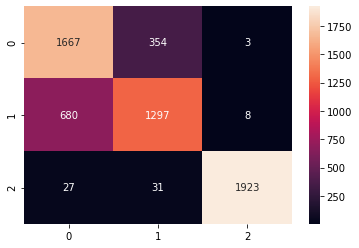

In [350]:
#fit the model
dTree = DecisionTreeClassifier(random_state=42)
dTree.fit(X_train_transformed,y_train)

#make predictions
PredicDeTree = dTree.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicDeTree)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicDeTree)
dTree_score = accuracy_score(y_test, PredicDeTree)
print(class_rep)
print("Accuracy: ", dTree_score)

### Random Forest

              precision    recall  f1-score   support

           1       0.73      0.96      0.83      2024
           2       0.94      0.64      0.76      1985
           3       1.00      0.99      0.99      1981

    accuracy                           0.87      5990
   macro avg       0.89      0.86      0.86      5990
weighted avg       0.89      0.87      0.86      5990

Accuracy:  0.8654424040066778


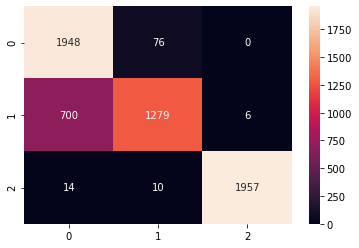

In [351]:
#fit the model
RFor = RandomForestClassifier(random_state=42)
RFor.fit(X_train_transformed,y_train)

#make predictions
PredicRFor = RFor.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicRFor)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicRFor)
RFor_score = accuracy_score(y_test, PredicRFor)
print(class_rep)
print("Accuracy: ", RFor_score)

#### Grid Search

In [397]:
RFor_param_grid = [{'max_depth':[9, 12, 14], 'max_features':[None, 'sqrt', 'auto']}]
RFor_grid_Search = grid_search(RFor, RFor_param_grid)

Obtaining Best Model for RandomForestClassifier
Best Parameters:  {'max_depth': 14, 'max_features': 'sqrt'}
Best Scores:  0.9329548200273795

Results for each run of RandomForestClassifier...
0.9379558832058149 0.8932843560955447 {'max_depth': 9, 'max_features': None}
0.936132263956761 0.8997142676312627 {'max_depth': 9, 'max_features': 'sqrt'}
0.936132263956761 0.8997142676312627 {'max_depth': 9, 'max_features': 'auto'}
0.9805970645919132 0.9159586223829429 {'max_depth': 12, 'max_features': None}
0.9822516222625253 0.9229150334981941 {'max_depth': 12, 'max_features': 'sqrt'}
0.9822516222625253 0.9229150334981941 {'max_depth': 12, 'max_features': 'auto'}
0.9909565777616719 0.922990337411758 {'max_depth': 14, 'max_features': None}
0.9941152072377605 0.9329548200273795 {'max_depth': 14, 'max_features': 'sqrt'}
0.9941152072377605 0.9329548200273795 {'max_depth': 14, 'max_features': 'auto'}


#### Result of Grid Search

              precision    recall  f1-score   support

           1       0.73      0.96      0.83      2024
           2       0.93      0.64      0.76      1985
           3       1.00      0.99      0.99      1981

    accuracy                           0.86      5990
   macro avg       0.89      0.86      0.86      5990
weighted avg       0.88      0.86      0.86      5990

Accuracy:  0.86110183639399


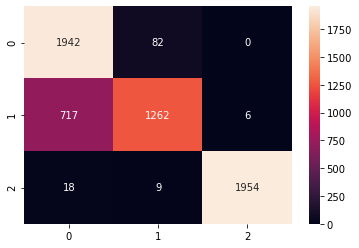

In [398]:
PredicRFor2 = RFor_grid_Search.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicRFor2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicRFor2)
RFor_score2 = accuracy_score(y_test, PredicRFor2)
print(class_rep)
print("Accuracy: ", RFor_score2)

actually worse than without grid searchm

### Gradient Boost

              precision    recall  f1-score   support

           1       0.72      0.94      0.81      2024
           2       0.91      0.62      0.74      1985
           3       1.00      0.99      0.99      1981

    accuracy                           0.85      5990
   macro avg       0.87      0.85      0.85      5990
weighted avg       0.87      0.85      0.85      5990

Accuracy:  0.8524207011686143


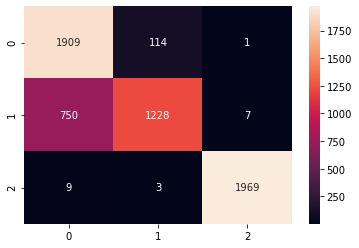

In [352]:
#fit the model
gradB = GradientBoostingClassifier(random_state=42)
gradB.fit(X_train_transformed,y_train)

#make predictions
PredicGradB = gradB.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicGradB)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicGradB)
gradB_score = accuracy_score(y_test, PredicGradB)
print(class_rep)
print("Accuracy: ", gradB_score)

#### Grid Search

In [386]:
gradB_param_grid = [{'max_depth':[3, 8, 16], 'max_features':[None, 'sqrt', 'auto']}]
gradB_grid_Search = grid_search(gradB, gradB_param_grid)

Obtaining Best Model for GradientBoostingClassifier
Best Parameters:  {'max_depth': 16, 'max_features': 'sqrt'}
Best Scores:  0.9553282312301855

Results for each run of GradientBoostingClassifier...
0.9174061824940981 0.8961044265737635 {'max_depth': 3, 'max_features': None}
0.9097729227478215 0.8886215540569431 {'max_depth': 3, 'max_features': 'sqrt'}
0.9174061824940981 0.8961044265737635 {'max_depth': 3, 'max_features': 'auto'}
1.0 0.9501391714058247 {'max_depth': 8, 'max_features': None}
0.9998871915393156 0.9523577183626846 {'max_depth': 8, 'max_features': 'sqrt'}
1.0 0.9501391714058247 {'max_depth': 8, 'max_features': 'auto'}
1.0 0.9388208218205562 {'max_depth': 16, 'max_features': None}
1.0 0.9553282312301855 {'max_depth': 16, 'max_features': 'sqrt'}
1.0 0.9388208218205562 {'max_depth': 16, 'max_features': 'auto'}


In [388]:
gradB_grid_Search.max_depth = 3
gradB_grid_Search.max_features = 'sqrt'

#### Result of Grid Search

              precision    recall  f1-score   support

           1       0.74      0.96      0.84      2024
           2       0.93      0.66      0.77      1985
           3       1.00      0.99      0.99      1981

    accuracy                           0.87      5990
   macro avg       0.89      0.87      0.87      5990
weighted avg       0.89      0.87      0.87      5990

Accuracy:  0.8706176961602671


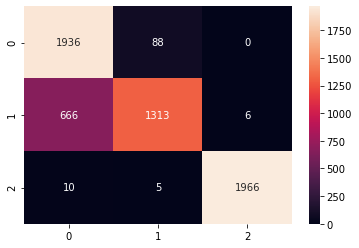

In [389]:
PredicGradB2 = gradB_grid_Search.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicGradB2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicGradB2)
gradB_score2 = accuracy_score(y_test, PredicGradB2)
print(class_rep)
print("Accuracy: ", gradB_score2)

### Ada Boost

              precision    recall  f1-score   support

           1       0.70      0.83      0.76      2024
           2       0.77      0.65      0.71      1985
           3       0.99      0.97      0.98      1981

    accuracy                           0.82      5990
   macro avg       0.82      0.82      0.82      5990
weighted avg       0.82      0.82      0.82      5990

Accuracy:  0.8155258764607679


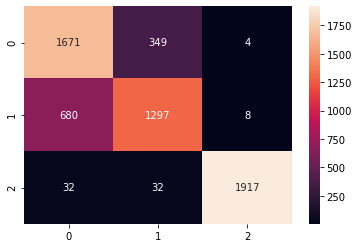

In [353]:
adaB = AdaBoostClassifier(dTree,random_state=42)
adaB.fit(X_train_transformed,y_train)

#make predictions
PredicAdaB = adaB.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicAdaB)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicAdaB)
adaB_score = accuracy_score(y_test, PredicAdaB)
print(class_rep)
print("Accuracy: ", adaB_score)

### XG boost

[09:44:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.75      0.90      0.82      2024
           2       0.87      0.70      0.78      1985
           3       1.00      0.99      1.00      1981

    accuracy                           0.87      5990
   macro avg       0.87      0.87      0.86      5990
weighted avg       0.87      0.87      0.86      5990

Accuracy:  0.8656093489148581


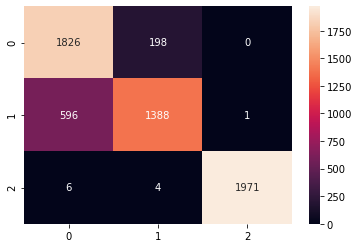

In [354]:
#fit the model
xgB = XGBClassifier(random_state=42,n_jobs=-1)
xgB.fit(X_train_transformed,y_train)

#make predictions
PredicXgb = xgB.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicXgb)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicXgb)
xgB_score = accuracy_score(y_test, PredicXgb)
print(class_rep)
print("Accuracy: ", xgB_score)

#### Grid Search

In [383]:
xgB_param_grid = [{'max_depth':[4, 8, 16], 'learning_rate':[0.01, 0.1, 1]}]
xgB_grid_Search = grid_search(xgB, xgB_param_grid)

Obtaining Best Model for XGBClassifier
[10:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters:  {'learning_rate': 1, 'max_depth': 8}
Best Scores:  0.957208466277489

Results for each run of XGBClassifier...
0.842953268639968 0.8299615870291298 {'learning_rate': 0.01, 'max_depth': 4}
0.9366398389337088 0.8945250254010721 {'learning_rate': 0.01, 'max_depth': 8}
0.9972174096840644 0.9224262325373992 {'learning_rate': 0.01, 'max_depth': 16}
0.933669249716261 0.9069340006502132 {'learning_rate': 0.1, 'max_depth': 4}
0.997161018709212 0.9464165568838094 {'learning_rate': 0.1, 'max_depth': 8}
1.0 0.952771338427801 {'learning_rate': 0.1, 'max_depth': 16}
0.999849589426047 0.9416410492526283 {'learning_rate': 1, 'max_depth': 4}

In [384]:
xgB_grid_Search.max_depth = 8
xgB_grid_Search.learning_rate = 0.01

#### Result of Grid Search

              precision    recall  f1-score   support

           1       0.77      0.89      0.82      2024
           2       0.86      0.72      0.79      1985
           3       1.00      1.00      1.00      1981

    accuracy                           0.87      5990
   macro avg       0.88      0.87      0.87      5990
weighted avg       0.88      0.87      0.87      5990

Accuracy:  0.8701168614357262


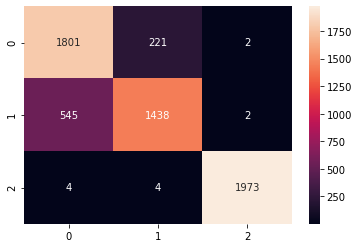

In [385]:
PredicXgb2 = xgB_grid_Search.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicXgb2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicXgb2)
xgB_score2 = accuracy_score(y_test, PredicXgb2)
print(class_rep)
print("Accuracy: ", xgB_score2)

### Bagging

              precision    recall  f1-score   support

           1       0.81      0.83      0.82      2024
           2       0.82      0.81      0.82      1985
           3       1.00      0.98      0.99      1981

    accuracy                           0.88      5990
   macro avg       0.88      0.88      0.88      5990
weighted avg       0.88      0.88      0.88      5990

Accuracy:  0.8759599332220367


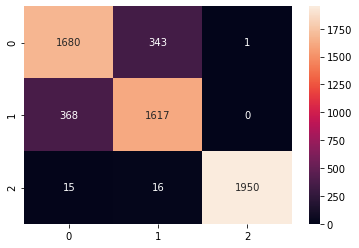

In [355]:
#fit the model
bagN = BaggingClassifier(Knn)
bagN.fit(X_train_transformed,y_train)

#make predictions
PredicBagN = bagN.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicBagN)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicBagN)
bagN_score = accuracy_score(y_test, PredicBagN)
print(class_rep)
print("Accuracy: ", bagN_score)

#### Result of Using a Model which underwent Grid Search

              precision    recall  f1-score   support

           1       0.81      0.85      0.83      2024
           2       0.83      0.80      0.82      1985
           3       1.00      0.98      0.99      1981

    accuracy                           0.88      5990
   macro avg       0.88      0.88      0.88      5990
weighted avg       0.88      0.88      0.88      5990

Accuracy:  0.8777963272120201


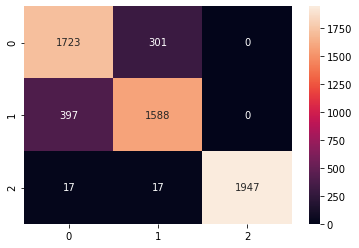

In [380]:

#fit the model
bagN2 = BaggingClassifier(Knn_grid_Search)
bagN2.fit(X_train_transformed,y_train)

#make predictions
PredicBagN2 = bagN2.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicBagN2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicBagN2)
bagN_score2 = accuracy_score(y_test, PredicBagN2)
print(class_rep)
print("Accuracy: ", bagN_score2)

### Stacking

[09:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

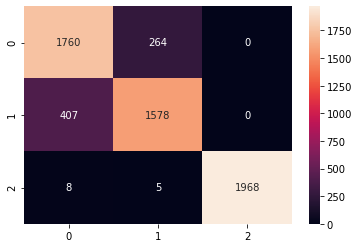

In [358]:
#fit the model
estimators=[
    ('KNN',Knn),
    ('Random Forest',RFor),
    ('GRadient Boosting',gradB),
    ('XG Boosting',xgB)]
Stk = StackingClassifier(estimators = estimators,final_estimator= bagN)
Stk.fit(X_train_transformed,y_train)

#make predictions
PredicStk = Stk.predict(X_test_transformed)
#evaluate predictions
confmat = confusion_matrix(y_test, PredicStk)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicStk)
Stk_score = accuracy_score(y_test, PredicStk)
print(class_rep)
print("Accuracy: ", Stk_score)

#### Result of Using a Model which underwent Grid Search

[11:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

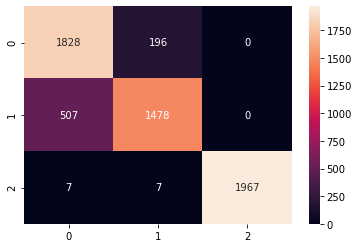

In [401]:
#fit the model
estimators=[
    ('KNN',Knn_grid_Search),
    ('Random Forest',RFor),
    ('GRadient Boosting',gradB_grid_Search),
    ('XG Boosting',xgB_grid_Search)]
Stk2 = StackingClassifier(estimators = estimators,final_estimator= bagN2)
Stk2.fit(X_train_transformed,y_train)

#make predictions
PredicStk2 = Stk2.predict(X_test_transformed)
#evaluate predictions
confmat = confusion_matrix(y_test, PredicStk2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicStk2)
Stk_score2 = accuracy_score(y_test, PredicStk2)
print(class_rep)
print("Accuracy: ", Stk_score2)

### Voting

In [364]:
estimatorsVot=[
    ('KNN',Knn),
    ('Random Forest',RFor),
    ('GRadient Boosting',gradB),
    ('XG Boosting',xgB),
    ('Bagging',bagN)]

In [403]:
estimatorsVot2=[
    ('KNN',Knn_grid_Search),
    ('Random Forest',RFor),
    ('GRadient Boosting',gradB_grid_Search),
    ('XG Boosting',xgB_grid_Search),
    ('Bagging',bagN2)]

### Voting - Hard

[10:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.76      0.94      0.84      2024
           2       0.91      0.70      0.79      1985
           3       1.00      0.99      1.00      1981

    accuracy                           0.88      5990
   macro avg       0.89      0.88      0.88      5990
weighted avg       0.89      0.88      0.88      5990

Accuracy:  0.8774624373956594


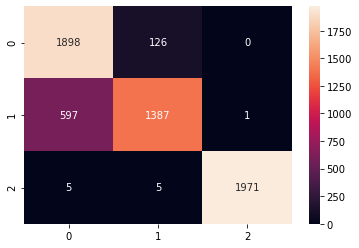

In [365]:
#fit the model
votH = VotingClassifier(estimators = estimatorsVot, voting='hard')
votH.fit(X_train_transformed,y_train)

#make predictions
PredicVotH = votH.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicVotH)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicVotH)
votH_score = accuracy_score(y_test, PredicVotH)
print(class_rep)
print("Accuracy: ", votH_score)

#### Result of Using a Model which underwent Grid Search

[11:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.74      0.95      0.83      2024
           2       0.92      0.67      0.78      1985
           3       1.00      0.99      0.99      1981

    accuracy                           0.87      5990
   macro avg       0.89      0.87      0.87      5990
weighted avg       0.89      0.87      0.87      5990

Accuracy:  0.8711185308848081


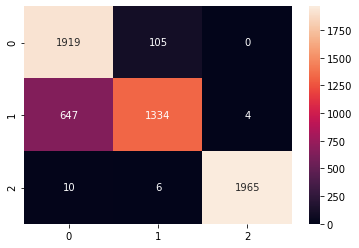

In [404]:
#fit the model
votH2 = VotingClassifier(estimators = estimatorsVot2, voting='hard')
votH2.fit(X_train_transformed,y_train)

#make predictions
PredicVotH2 = votH2.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicVotH2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicVotH2)
votH_score2 = accuracy_score(y_test, PredicVotH2)
print(class_rep)
print("Accuracy: ", votH_score2)

### Voting - Soft

[10:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.78      0.92      0.85      2024
           2       0.90      0.74      0.81      1985
           3       1.00      1.00      1.00      1981

    accuracy                           0.89      5990
   macro avg       0.89      0.89      0.89      5990
weighted avg       0.89      0.89      0.88      5990

Accuracy:  0.8858096828046744


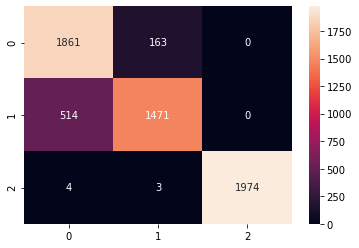

In [366]:
#fit the model
votS = VotingClassifier(estimators = estimatorsVot, voting='soft')
votS.fit(X_train_transformed,y_train)

#make predictions
PredicVotS = votS.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicVotS)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicVotS)
votS_score = accuracy_score(y_test, PredicVotS)
print(class_rep)
print("Accuracy: ", votS_score)

#### Result of Using a Model which underwent Grid Search

[11:33:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.77      0.93      0.84      2024
           2       0.90      0.71      0.80      1985
           3       1.00      0.99      1.00      1981

    accuracy                           0.88      5990
   macro avg       0.89      0.88      0.88      5990
weighted avg       0.89      0.88      0.88      5990

Accuracy:  0.8786310517529216


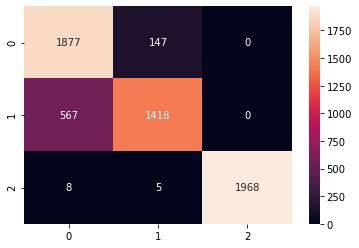

In [405]:
#fit the model
votS2 = VotingClassifier(estimators = estimatorsVot2, voting='soft')
votS2.fit(X_train_transformed,y_train)

#make predictions
PredicVotS2 = votS2.predict(X_test_transformed)

#evaluate predictions
confmat = confusion_matrix(y_test, PredicVotS2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep = classification_report(y_test, PredicVotS2)
votS_score2 = accuracy_score(y_test, PredicVotS2)
print(class_rep)
print("Accuracy: ", votS_score2)

## Model Evaluation

In [390]:
Scores = pd.DataFrame({
    'Model':['KNeighborsClassifier','LogisticRegressionClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostClassifier','AdaBoostClassifier','XGBoostClassifier','BaggingClassifier','StackingClassifier','VotingClassifier(Hard)','VotingClassifier(Soft)'],
    'Accuracy':[Knn_score2,logR_score,dTree_score,RFor_score,gradB_score2,adaB_score,xgB_score2,bagN_score2,Stk_score,votH_score,votS_score]})
Scores

,Model,Accuracy
0,KNeighborsClassifier,0.877462
1,LogisticRegressionClassifier,0.844073
2,DecisionTreeClassifier,0.815860
3,RandomForestClassifier,0.865442
4,GradientBoostClassifier,0.870618
5,AdaBoostClassifier,0.815526
6,XGBoostClassifier,0.870117
7,BaggingClassifier,0.877796
8,StackingClassifier,0.885810
9,VotingClassifier(Hard),0.877462


### Conclusion

**Which is the best classifier?**

In [378]:
print("The best Classifier is Stacking with a Accuracy of ",Scores['Accuracy'].max())

The best Classifier is Stacking with a Accuracy of  0.8858096828046744


**What did we Learn?**

For the best Models the F1 score for label 3 is 100% while for label 1,2 its in the 80's which shows that understanding if someone is alone or company of another is a lot easier for the model to know then if is someone doing actions Spontanious or in Sync